# How transport infrastructure deficit can affect economic development

# Problem

One of the most important and yet unanswered questions in transport economics is about relationship between transport infrastructure and economic development.  

Theoretical work shows that transport infrastructure is a necessary condition for economic development (i.e. a "bottleneck factor"). In other words, transport infrastructure deficit hinders economic growth.  

Below I will prove this point empirically using Israel as an example with a support of international economic and transport data.

**Note**: *This analysis is part of my research article: Bizyaev A. Transport infrastructure deficit and economic development: Israeli case. Finance and Business. St. Petersburg. 2021. In Russian.*  

*This code is a Python adaptation of my original code written in R.*

# Setup

I will use a dataset that contains three groups of variables: transport-related, economy-related, and other. The data is present for 27 countries, has 17 variables and covers three time periods: 1995, 2005 and 2015.

The dataset has already been preprocessed for the purposes of research: every variable (whenever applicable) has been converted either into per capita terms or into percentages to allow for international comparison.

## Structure of analysis

1. Since the data has 17 variables, the first step is to conduct PCA and try to "compress" all variables ideally into two groups, i.e. transport and economy.
2. Next step is to do cluster analysis to split the countries into different groups and study their behavior separately.
3. Then we can estimate the relationship between transport and economy within clusters using simple linear regression (using the simplest functional form seems to be appropriate since the general direction of relationship matters most).
4. Finally, compare the results across three time periods to see how the clusters evolve.

## Variables

1. Transport-related variables:
* Total number of buses per capita (Buses_percap)
* Total number of cars per capita (Cars_percap)
* Railway passenger traffic per capita, passenger-km (Rail_perform_pkm_percap)
* Total length of railway network per capita, km (Railway_length_km_percap)
2. Economy-related variables:
* % of working population employed in industry and services (Employment_industry_(pct.\_of\_total) and Employment_services_(pct.\_of_total), respectively)
* Energy consumption per capita, kg of oil equivalent (Energy_use_(kg_of_oil_equivalent_per_capita))
* Exports per capita in 2010 USD (Exports_\$2010_percap)
* Imports per capita in 2010 USD (Imports_\$2010_percap)
* Industrial output per capita in 2010 USD (Industry_\$2010_percap)
* Life expectancy at birth, years (Life_expectancy_(years))
* Mobile cellular subscriptions per capita (Mobile_cellular_subscriptions_percap)
* Output of services per capita in 2010 USD (Services_\$2010_percap)
* Unemployment, % of population (Unemployment_(pct.))
* Total health expenditure per capita in 2010 USD (Health_expend_\$2010_percap)
* Gross domestic product per capita in 2010 USD (GDP_per_capita_(2010_US$))
3. Other variables:
* Country name
* Year

## Data sources

* World Bank (https://databank.worldbank.org/source/world-development-indicators)
* Eurostat Transport Statistics (https://ec.europa.eu/eurostat/web/transport/data/database)
* Central Bureau of Statistics of Israel (https://www.cbs.gov.il/en)

# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('data.xlsx', engine='openpyxl')
data

,Country,Year,Buses_percap,Cars_percap,Employment_industry_(pct._of_total),Employment_services_(pct._of_total),Energy_use_(kg_of_oil_equivalent_per_capita),Exports_$2010_percap,Imports_$2010_percap,Industry_$2010_percap,Life_expectancy_(years),Mobile_cellular_subscriptions_percap,Rail_perform_pkm_percap,Railway_length_km_percap,Road_length_km_percap,Services_$2010_percap,Unemployment_(pct.),Health_expend_$2010_percap,GDP_per_capita_(2010_US$)
0,Austria,1995,0.001227,0.452122,32.101002,60.563000,3373.603565,12252.336646,12687.255841,10541.770888,76.668293,0.048001,1273.735015,0.000714,0.013175,21527.390199,4.347300,NaN,36537.993519
1,Bulgaria,1995,0.004977,0.195998,37.436001,45.768002,2746.667734,1385.229825,981.891118,763.530428,71.053415,0.002497,558.287247,0.000511,0.004335,2796.132948,11.100000,NaN,4283.397843
2,Croatia,1995,0.000844,0.153876,29.145000,50.214001,1692.158925,2362.763641,3071.483126,2294.880313,72.084390,0.007297,246.535196,0.000497,0.005763,4316.108241,NaN,NaN,8568.425152
3,Czechia,1995,0.001983,0.294688,42.254002,51.108002,4019.804879,5438.990759,5855.775985,4758.953554,73.074878,0.004721,776.876484,0.000913,0.011768,6931.900450,4.024000,NaN,13462.986799
4,Denmark,1995,0.002612,0.320827,27.077000,68.528000,3706.440187,17984.843753,15671.494924,10852.500106,75.212683,0.157139,934.005659,0.000547,0.013476,30276.350282,6.992100,NaN,49122.869161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Spain,2015,0.001297,0.481336,19.903999,75.972000,2571.340962,10272.831376,9343.996820,6136.522413,82.831707,1.094186,562.861332,0.000346,0.003244,20767.530690,22.057301,2782.856367,30549.791814
77,Sweden,2015,0.001440,0.476475,18.287001,79.677002,5102.785578,24658.194323,22511.797997,12483.856367,82.204878,1.294305,1300.210038,0.001113,0.021734,36792.133289,7.431600,6199.494809,56339.994297
78,Switzerland,2015,0.007935,0.538258,20.750000,75.810997,2960.073389,47628.503224,38670.161016,19218.865850,82.897561,1.355130,2461.763480,0.000434,0.008461,54384.424166,4.800700,9097.824875,76553.282138
79,Turkey,2015,0.008484,0.134845,27.226000,52.368000,1651.361454,3234.134408,3595.423883,3865.608317,76.532000,0.937728,61.480152,0.000129,0.003013,7384.866503,10.236000,573.316806,13853.097134


## 1995

We begin with year 1995.  
Later we will repeat our analysis for 2005 and 2015.

In [3]:
year = 1995

df_1995 = data[data['Year'] == year].copy()
df_1995

,Country,Year,Buses_percap,Cars_percap,Employment_industry_(pct._of_total),Employment_services_(pct._of_total),Energy_use_(kg_of_oil_equivalent_per_capita),Exports_$2010_percap,Imports_$2010_percap,Industry_$2010_percap,Life_expectancy_(years),Mobile_cellular_subscriptions_percap,Rail_perform_pkm_percap,Railway_length_km_percap,Road_length_km_percap,Services_$2010_percap,Unemployment_(pct.),Health_expend_$2010_percap,GDP_per_capita_(2010_US$)
0,Austria,1995,0.001227,0.452122,32.101002,60.563000,3373.603565,12252.336646,12687.255841,10541.770888,76.668293,0.048001,1273.735015,0.000714,0.013175,21527.390199,4.347300,NaN,36537.993519
1,Bulgaria,1995,0.004977,0.195998,37.436001,45.768002,2746.667734,1385.229825,981.891118,763.530428,71.053415,0.002497,558.287247,0.000511,0.004335,2796.132948,11.100000,NaN,4283.397843
2,Croatia,1995,0.000844,0.153876,29.145000,50.214001,1692.158925,2362.763641,3071.483126,2294.880313,72.084390,0.007297,246.535196,0.000497,0.005763,4316.108241,NaN,NaN,8568.425152
3,Czechia,1995,0.001983,0.294688,42.254002,51.108002,4019.804879,5438.990759,5855.775985,4758.953554,73.074878,0.004721,776.876484,0.000913,0.011768,6931.900450,4.024000,NaN,13462.986799
4,Denmark,1995,0.002612,0.320827,27.077000,68.528000,3706.440187,17984.843753,15671.494924,10852.500106,75.212683,0.157139,934.005659,0.000547,0.013476,30276.350282,6.992100,NaN,49122.869161
5,Estonia,1995,0.004873,0.266904,34.230000,55.590000,3624.431136,4756.529971,5282.320776,1976.297303,67.543902,0.021250,293.046106,0.000711,0.030457,4109.084135,9.659000,NaN,7209.402946
6,Finland,1995,0.001582,0.372148,27.597000,64.644997,5661.903876,11409.677976,9031.016177,9408.144783,76.409512,0.202994,623.361571,0.001151,0.015139,17331.730092,17.004601,NaN,31901.842899
7,France,1995,0.001327,0.468108,26.940001,68.169998,3981.352509,7673.227367,7130.634317,7567.013991,77.751220,0.022534,786.001132,0.000536,0.015974,21969.937581,11.835600,NaN,33917.926210
8,Hungary,1995,0.001981,0.217345,32.577000,59.402000,2503.077801,3510.310033,3511.003737,2311.532563,69.791707,0.025606,817.216439,0.000747,0.002879,4631.305164,10.168000,NaN,8957.504838
9,Ireland,1995,0.001464,0.276673,27.781000,60.209000,2951.913093,21805.391566,18561.615140,8572.794731,75.617561,0.043984,357.732580,0.000541,0.025593,16511.961351,11.983500,NaN,29694.646998


In [4]:
countries = df_1995['Country'].tolist()

We need to drop Year column because it won't participate in PCA  
Also health expenditure variable is NaN for this year - we have to drop it too

In [5]:
df_1995.drop(columns=['Year', 'Health_expend_$2010_percap'], inplace=True)

Work with NaNs

In [6]:
df_1995.isna().sum()

Country                                         0
Buses_percap                                    0
Cars_percap                                     0
Employment_industry_(pct._of_total)             0
Employment_services_(pct._of_total)             0
Energy_use_(kg_of_oil_equivalent_per_capita)    0
Exports_$2010_percap                            0
Imports_$2010_percap                            0
Industry_$2010_percap                           0
Life_expectancy_(years)                         0
Mobile_cellular_subscriptions_percap            1
Rail_perform_pkm_percap                         0
Railway_length_km_percap                        0
Road_length_km_percap                           1
Services_$2010_percap                           0
Unemployment_(pct.)                             2
GDP_per_capita_(2010_US$)                       0
dtype: int64

We still have NaNs

We have to impute missing values with averages  
I admit this is not the best way to deal with NaNs, but a) we cannot drop rows with missing values because these are countries and we have only limited number of those; b) we need numbers for PCA

In [7]:
df_1995.fillna(df_1995.iloc[:,1:].mean(), inplace=True)
df_1995.isna().sum().sum()

0

I will be using `factor_analyzer` library instead of `sklearn` because its default settings are better aligned with R's `psych` package which I used for PCA in my original article.

In [8]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans

We are ready to do PCA with 2 components.  
To see which variables went into which components, we will use loadings matrix.

In [9]:
def fa(df):
    df.iloc[:,1:] = StandardScaler().fit_transform(df.iloc[:,1:])
    fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='principal')
    fa.fit(df.iloc[:,1:])
    loadings = fa.loadings_

    ld = pd.DataFrame({'indicator':df.iloc[:,1:].columns.to_list(), 'RC1':loadings[:,0], 'RC2':loadings[:,1]})
    ld_style = ld.style.applymap(lambda x: None if type(x) == str or abs(x) < 0.5 
                                                     else 'background-color:lightgreen')
    return ld_style

fa(df_1995)

,indicator,RC1,RC2
0,Buses_percap,-0.112121,0.788033
1,Cars_percap,0.863961,-0.068668
2,Employment_industry_(pct._of_total),-0.442460,-0.243143
3,Employment_services_(pct._of_total),0.830756,0.080772
4,Energy_use_(kg_of_oil_equivalent_per_capita),0.826682,0.240761
5,Exports_$2010_percap,0.819699,0.109557
6,Imports_$2010_percap,0.833670,0.091183
7,Industry_$2010_percap,0.923571,0.159257
8,Life_expectancy_(years),0.823879,-0.351399
9,Mobile_cellular_subscriptions_percap,0.609487,0.303159


The second rotated component (RC2) comprises mostly infrastructure (road and railway), while the first one takes almost all the other variables.  

Let's call RC1 "economy", and "RC2" - "transport infrastructure"

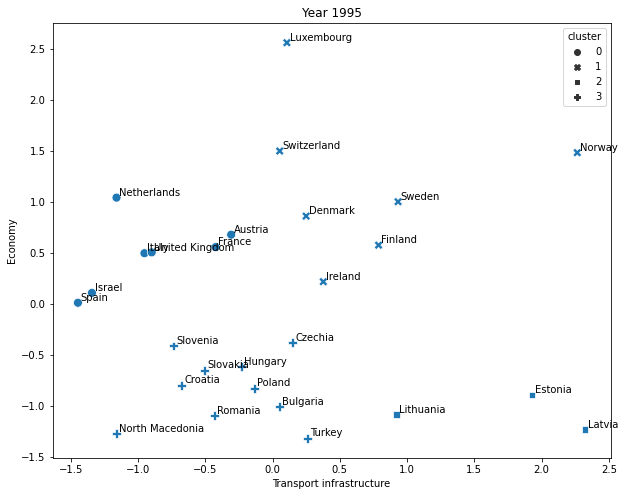

In [10]:
def plot_rc(df, countries):
    df.iloc[:,1:] = StandardScaler().fit_transform(df.iloc[:,1:])
    
    fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='principal')
    fa.fit(df.iloc[:,1:])
    
    # extract rotated principal components
    
    scores = fa.transform(df.iloc[:,1:])
    rc = pd.DataFrame({'country':countries, 'RC1':scores[:,0], 'RC2':scores[:,1]})
    
    # perform cluster analysis using K-Means with k = 4
    # the optimal value of k has been chosen after several iterations which are omitted for brevity
    
    kmeans = KMeans(n_clusters=4, random_state=1)
    kmeans.fit(rc.iloc[:,1:])
    labels = kmeans.labels_
    rc['cluster'] = labels
    
    # plot the results

    f = plt.figure()
    f.set_size_inches(10,8)
    ax = sns.scatterplot(data=rc, x='RC2', y='RC1', style='cluster', s=80)

    for line in range(0,rc.shape[0]):
         ax.text(rc.RC2[line]+0.02, rc.RC1[line]+0.02, 
         rc.country[line], horizontalalignment='left', size='medium',
     color='black')
    plt.xlabel('Transport infrastructure')
    plt.ylabel('Economy')
    plt.title(f'Year {year}')
    plt.show()
    
    # return rotated components matrix for later use
    
    return rc
    
rc = plot_rc(df_1995, countries)

Let's call the four clusters top-left (TL), top-right (TR), bottom-left (BL), and bottom-right (BR).  

The bottom-left group consists of countries with low levels of transport infrastructure and economic indicators. These are mostly Eastern Europe countries.  

The bottom-right countries have relatively good level of transport infrastructure supply but relatively low level of economic development. These are mainly Baltic countries.

Top-right countries have high scores in both economy and transport. These are mainly Scandinavian countries.  

Top-left countries have relatively high level of economic development but low levels of transport infrastructure supply. These are mainly Western Europe countries. Since Israel belongs to this group too, it will be of particular interest to us. 

Notice that Israel has one of the lowest scores within TL countries along both economy and transport axes. Let's plot a trendline to see how economy and transport are related within this group.

In [11]:
tl = rc[rc['cluster'] == 0]
tl.reset_index(inplace=True)

tr = rc[rc['cluster'] == 1]
tr.reset_index(inplace=True)

br = rc[rc['cluster'] == 2]
br.reset_index(inplace=True)

bl = rc[rc['cluster'] == 3]
bl.reset_index(inplace=True)

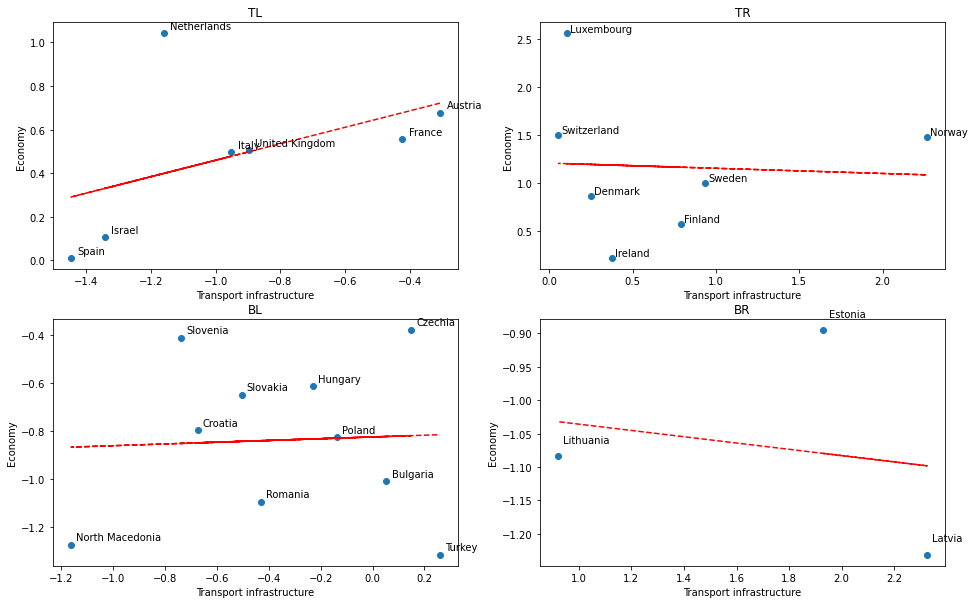

In [12]:
def plot_trend(tl, tr, br, bl):
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(16,10)

    # TL

    axs[0, 0].scatter(tl['RC2'], tl['RC1'])
    axs[0, 0].set_title('TL')

    # add a trendline
    z = np.polyfit(tl['RC2'], tl['RC1'], 1)
    p = np.poly1d(z)
    axs[0, 0].plot(tl['RC2'],p(tl['RC2']),"r--")


    for line in range(0,tl.shape[0]):
         axs[0, 0].text(tl.RC2[line]+0.02, tl.RC1[line]+0.02, 
         tl.country[line], horizontalalignment='left', size='medium', color='black')

    # TR        

    axs[0, 1].scatter(tr['RC2'], tr['RC1'])
    axs[0, 1].set_title('TR')

    z = np.polyfit(tr['RC2'], tr['RC1'], 1)
    p = np.poly1d(z)
    axs[0, 1].plot(tr['RC2'],p(tr['RC2']),"r--")

    for line in range(0,tr.shape[0]):
         axs[0, 1].text(tr.RC2[line]+0.02, tr.RC1[line]+0.02, 
         tr.country[line], horizontalalignment='left', size='medium', color='black')

    # BL

    axs[1, 0].scatter(bl['RC2'], bl['RC1'])
    axs[1, 0].set_title('BL')

    z = np.polyfit(bl['RC2'], bl['RC1'], 1)
    p = np.poly1d(z)
    axs[1, 0].plot(bl['RC2'],p(bl['RC2']),"r--")

    for line in range(0,bl.shape[0]):
         axs[1, 0].text(bl.RC2[line]+0.02, bl.RC1[line]+0.02, 
         bl.country[line], horizontalalignment='left', size='medium', color='black')

    # BR

    axs[1, 1].scatter(br['RC2'], br['RC1'])
    axs[1, 1].set_title('BR')

    z = np.polyfit(br['RC2'], br['RC1'], 1)
    p = np.poly1d(z)
    axs[1, 1].plot(br['RC2'],p(br['RC2']),"r--")

    for line in range(0,br.shape[0]):
         axs[1, 1].text(br.RC2[line]+0.02, br.RC1[line]+0.02, 
         br.country[line], horizontalalignment='left', size='medium', color='black')

    for ax in axs.flat:
        ax.set(xlabel='Transport infrastructure', ylabel='Economy')
        
plot_trend(tl, tr, br, bl)

Only the TL group shows a more or less clear positive relationship between transport infrastructure and economic development. Perhaps it is not so evident for TR countries because they already have enough transport infrastructure so that any additional surplus of it does not have any significant impact on their economy. For BL countries, a possible explanation might be that their economies have not yet reached the stage where lack of transportation starts to hinder economic growth. As for BR group, we currently do not have enough observations to make any meaningful conclusions.

It is worth noticing that Israel, which has one of the lowest scores within its group, could improve its economic indicators by increasing its transport infrastructure supply. Currently Israel loses about 6% of its annual GDP in traffic jams (Moav and Schreiber, 2017), and other research provides a theretical link between Israeli transport infrastructure deficit and its economic growth (Banister and Berechman, 2000).  

To further illustrate this point, let's take a look at other years.

## 2005

In [13]:
year = 2005

df_2005 = data[data['Year'] == year].copy()
df_2005.drop(columns=['Year'], inplace=True)
df_2005.isna().sum()

Country                                         0
Buses_percap                                    0
Cars_percap                                     0
Employment_industry_(pct._of_total)             0
Employment_services_(pct._of_total)             0
Energy_use_(kg_of_oil_equivalent_per_capita)    0
Exports_$2010_percap                            0
Imports_$2010_percap                            0
Industry_$2010_percap                           0
Life_expectancy_(years)                         0
Mobile_cellular_subscriptions_percap            0
Rail_perform_pkm_percap                         0
Railway_length_km_percap                        0
Road_length_km_percap                           3
Services_$2010_percap                           0
Unemployment_(pct.)                             0
Health_expend_$2010_percap                      0
GDP_per_capita_(2010_US$)                       0
dtype: int64

We do not need to completely drop any columns here because they all have enough observations.

In [14]:
df_2005.fillna(df_2005.iloc[:,1:].mean(), inplace=True)
df_2005.isna().sum().sum()

0

In [15]:
fa(df_2005)

,indicator,RC1,RC2
0,Buses_percap,-0.001578,0.298749
1,Cars_percap,0.761185,0.295026
2,Employment_industry_(pct._of_total),-0.736527,0.196222
3,Employment_services_(pct._of_total),0.867171,0.085512
4,Energy_use_(kg_of_oil_equivalent_per_capita),0.803723,0.318010
5,Exports_$2010_percap,0.775936,0.045438
6,Imports_$2010_percap,0.762698,0.034110
7,Industry_$2010_percap,0.798836,0.216950
8,Life_expectancy_(years),0.816667,-0.215020
9,Mobile_cellular_subscriptions_percap,0.486177,0.410676


Here it is even clearer that RC2 is only transport infrastructure and RC1 is everything else.

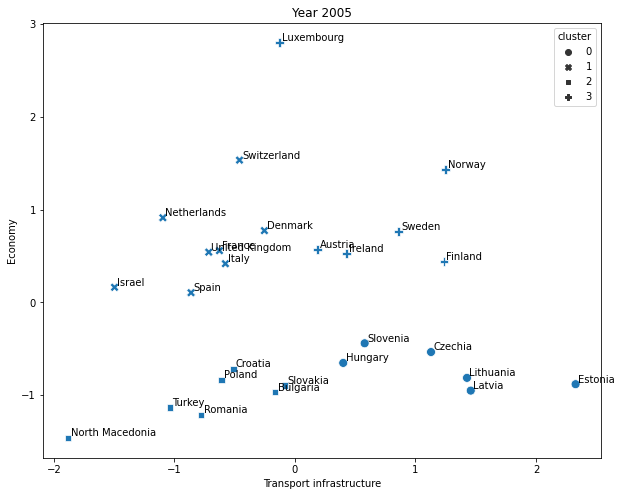

In [16]:
rc = plot_rc(df_2005, countries)

We can see some changes in the groups' composition. For example, Austria has moved from TL to TR which can be attributed to structural reforms within its road and railway transportation markets (Emberger, 2017). Several Eastern European countries like Slovenia, Hungary and Czech Republic have left BL and joined BR. Each of these changes deserves a more detailed inquery which could be done in further research.

Israel now has the lowest scores withing its group for both transport and economy and the second worst across all countries on transport infrastructure supply.

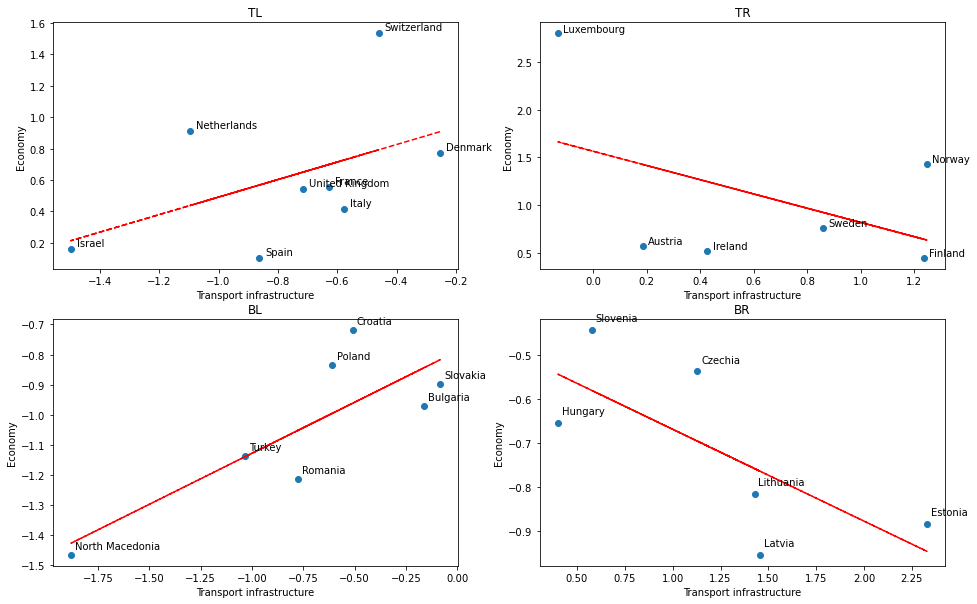

In [17]:
tl = rc[rc['cluster'] == 1]
tl.reset_index(inplace=True)

tr = rc[rc['cluster'] == 3]
tr.reset_index(inplace=True)

br = rc[rc['cluster'] == 0]
br.reset_index(inplace=True)

bl = rc[rc['cluster'] == 2]
bl.reset_index(inplace=True)

plot_trend(tl, tr, br, bl)

TL maintains a positive relationship between transport infrastructure supply and economic development. In other groups, compared to the previous period, the relatioship has become more pronounced, albeit different.  

TR has a negative relationship which is the result of Luxembourg being an outlier.  

BL now has a positive relationship. This might indicate that these countries' economies have reached a stage where insufficient road and railway supply negatively affects economic growth.

BR, on the contrary, shows negative relationship. This is a peculiar result. The explanation might lie in the Soviet past of these countries, or be an artifact of k-means in this particular setup, or something else. This result clearly deserves additional research that might shed light on the explanation of this result, which, unfortunately, is beyond the scope of this piece of code.

## 2015

In [18]:
year = 2015

df_2015 = data[data['Year'] == year].copy()
df_2015.drop(columns=['Year'], inplace=True)
df_2015.isna().sum()

Country                                         0
Buses_percap                                    0
Cars_percap                                     0
Employment_industry_(pct._of_total)             0
Employment_services_(pct._of_total)             0
Energy_use_(kg_of_oil_equivalent_per_capita)    6
Exports_$2010_percap                            0
Imports_$2010_percap                            0
Industry_$2010_percap                           0
Life_expectancy_(years)                         0
Mobile_cellular_subscriptions_percap            0
Rail_perform_pkm_percap                         0
Railway_length_km_percap                        0
Road_length_km_percap                           0
Services_$2010_percap                           0
Unemployment_(pct.)                             0
Health_expend_$2010_percap                      0
GDP_per_capita_(2010_US$)                       0
dtype: int64

In [19]:
df_2015.fillna(df_2015.iloc[:,1:].mean(), inplace=True)
df_2015.isna().sum().sum()

0

In [20]:
fa(df_2015)

,indicator,RC1,RC2
0,Buses_percap,0.084374,-0.139808
1,Cars_percap,0.608812,0.497394
2,Employment_industry_(pct._of_total),-0.795161,0.177759
3,Employment_services_(pct._of_total),0.844660,0.067365
4,Energy_use_(kg_of_oil_equivalent_per_capita),0.472066,0.588879
5,Exports_$2010_percap,0.719596,0.088731
6,Imports_$2010_percap,0.717153,0.100577
7,Industry_$2010_percap,0.764560,0.085422
8,Life_expectancy_(years),0.827789,-0.109771
9,Mobile_cellular_subscriptions_percap,0.241739,0.563271


Even though here RC2 also includes mobile cellular subscriptions and energy use, the only two persistent indicators across all three time periods are railways and roads.

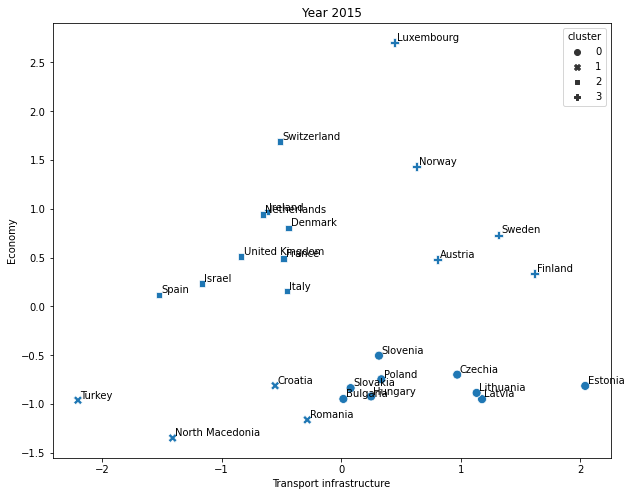

In [21]:
rc = plot_rc(df_2015, countries)

Although in 2015 Israel has slightly improved its transport infrastructure scores among the whole sample, its position within the TL group has not changed much.  

More countries have left BL and joined BR. However, the difference between these groups has become less clear. Now it seems that countries with relatively low levels of economic development can have all possible levels of transport infrastructure supply with apparently no clear relationship between the two (as can be seen on the charts below).   

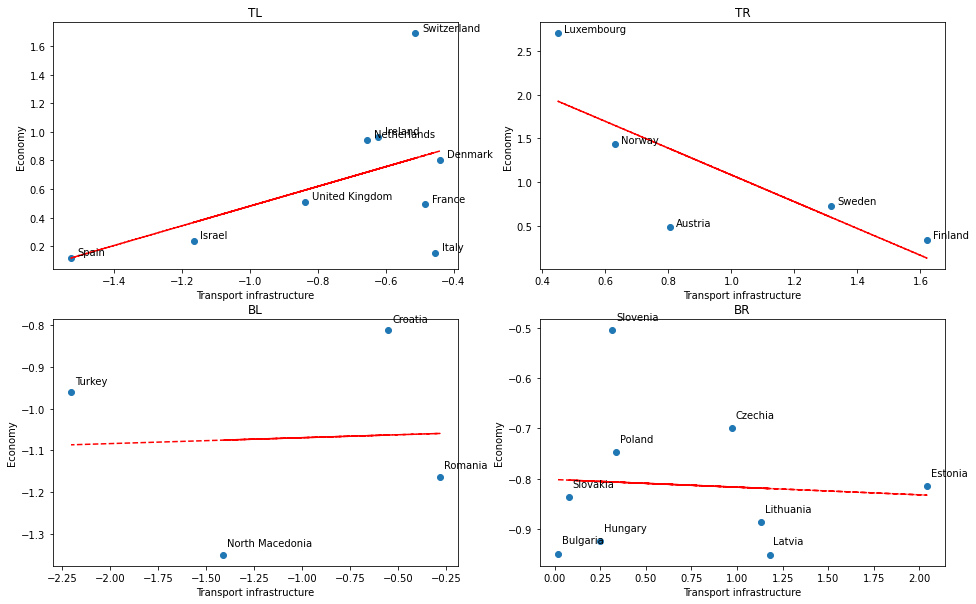

In [22]:
tl = rc[rc['cluster'] == 2]
tl.reset_index(inplace=True)

tr = rc[rc['cluster'] == 3]
tr.reset_index(inplace=True)

br = rc[rc['cluster'] == 0]
br.reset_index(inplace=True)

bl = rc[rc['cluster'] == 1]
bl.reset_index(inplace=True)

plot_trend(tl, tr, br, bl)

For economically developed countries, the relationship between economic growth and transport infrastructure depends on whether the countries has low or high transport infrastructure supply. For the former, this relationship is positive, for latter - negative.  

It seems that after an economy reaches some threshold in terms of roads and railways supply, its growth no longer depends on it and road construction stops being an economic driver.  

TL group has consistently shown a positive relationship across all three periods, which adds to the robustness of the results despite a relatively small sample size.

# Conclusion

Findings of this research show that for countries with relatively developed economies but low levels of transport infrastructure supply the deficit of the latter can hinder economic growth.  

Israel is a prime example here, which has consistently scored lowest within its country group across last 20 years. If Israel could considerably increase its road and railway supply, this would have positively affected its economic growth. This result is consistent with theoretical research (Banister and Berechman, 2000) as well as recent findings on traffic jams' negative impact on Israeli GDP (Moav and Schreiber, 2017).  

The analysis was also extended on other groups of countries. Countries with low levels of both economic and trasnport indicators (mainly Balcan countries, some Eastern European countries, and Turkey) have not shown consistent relatinoship between the former and the latter. It is possible that for these countries transport infrastructure deficit is not yet a bottleneck factor for economic development.

Countries with relatively high supply of transport infrastructure but low levels of economic development (mostly Baltic countries and some Eastern European countries) have shown some negative relationship between economic development and transport infrastructure. Possible explanation might lie in their Soviet past when huge infrastructure projects were common but the shift to market economy was still underway.  

Finally, countries with high levels of both indicators have been showing negative relationship too but for different reasons. Presumably these countries have been maintaining high levels of transport infrastructure for reasons that cannot be fully captured by common economic indicators, for example ability to see relatives more often or to get better recreational opportunities. Investigating each group of countries individually could be an avenue for future research.